[ot link](https://pot.readthedocs.io/en/stable/)

In [103]:
%matplotlib inline

In [514]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import ot
import ot.plot
from ot.datasets import make_1D_gauss as gauss

In [604]:
nn = 200
x = np.linspace(-1, 1, nn)
pdf1, pdf2 = 1+ np.sin(8*x), np.exp(-x)
normalizer = np.sum(pdf2)/np.sum(pdf1)
pdf1 *= normalizer
np.sum(pdf1)-np.sum(pdf2)
t = 0.95

(0, 2.8)

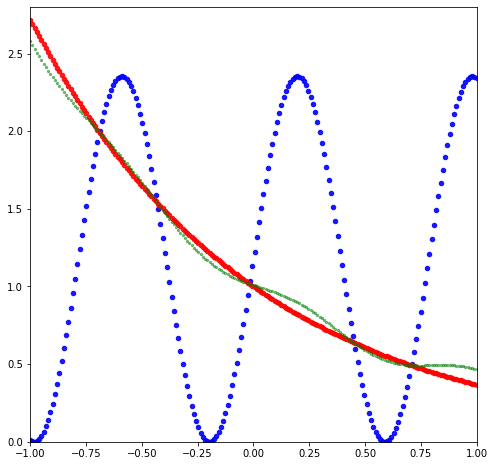

In [605]:
fig, ax = plt.subplots(1, 1,figsize=(8, 8))
ax.scatter(x, pdf1,alpha=0.9, s = 20, c = 'b')
ax.scatter(x,pdf2, alpha=0.9, s = 20, c = 'r')
ax.scatter(x,(1-t)*pdf1+ t*pdf2, alpha=0.5, s = 5, c = 'g')
ax.set_xlim([-1, 1])
ax.set_ylim([0, 2.8])

In [606]:
M = ot.dist(x.reshape((nn, 1)), x.reshape((nn, 1)))
Id = np.eye(nn)
G0 = ot.emd(pdf1, pdf2, M)
T = G0.transpose()

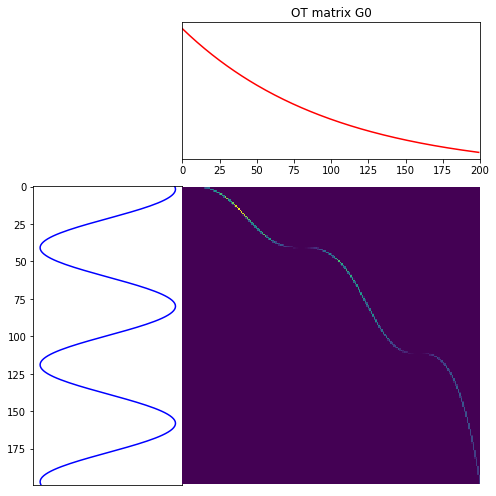

In [607]:
plt.figure( figsize=(7, 7))
ot.plot.plot1D_mat(pdf1, pdf2, T, 'OT matrix G0')

In [627]:
tol = 10**(-6)
lista  = np.array([((1-t)*x[j] + t*x[i],  T[i,j], int(i), int(j)) \
          for i in range (nn) for j in range(nn) if  T[i,j]> tol])
lista = lista[lista[:,0].argsort()]
zl = [z[0] for z in lista]
cl = [z[1] for z in lista]
diff = np.diff(zl)
len(zl)-len(diff)

1

(0.0, 3)

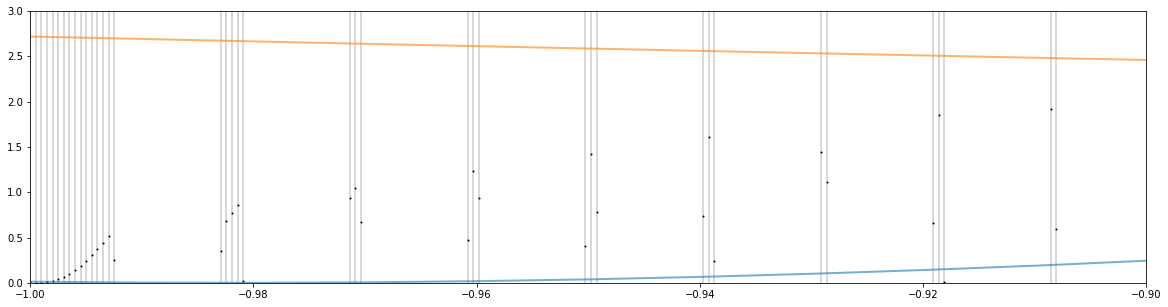

In [625]:
fig, ax = plt.subplots(1, 1,figsize=(20, 5))
#ax.scatter( z_intp[1:], weig_intp,alpha=1, s = 1 , c = 'k')
for z in zl:
    ax.vlines(z,0,3, alpha=0.2)
ax.scatter( zl, cl,alpha=1, s = 1 , c = 'k')
ax.plot(x, pdf1, lw=2, alpha=0.6)
ax.plot(x, pdf2,   lw = 2, alpha=0.6)
ax.set_xlim([-1, -0.9])
ax.set_ylim([0.0, 3])

(0.0, 0.01)

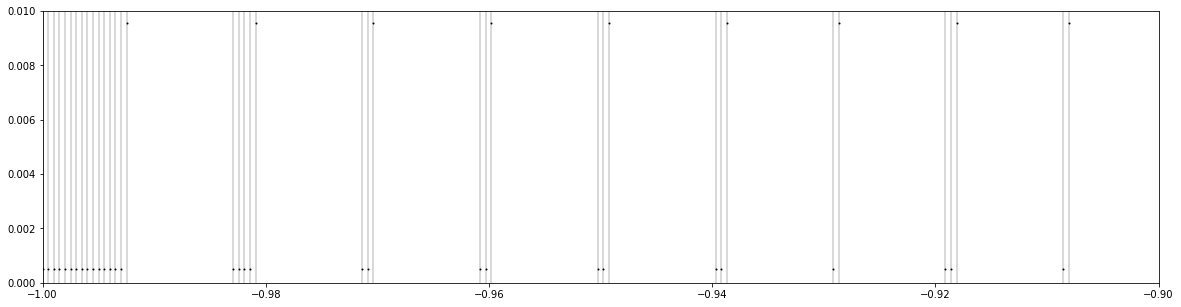

In [628]:
fig, ax = plt.subplots(1, 1,figsize=(20, 5))
#ax.scatter( z_intp[1:], weig_intp,alpha=1, s = 1 , c = 'k')
for z in zl:
    ax.vlines(z,0,0.01, alpha=0.2)
ax.scatter( zl[:-1], diff,alpha=1, s = 1 , c = 'k')
 
ax.set_xlim([-1,-0.9])
ax.set_ylim([0.0, 0.01])

In [629]:
np.round(diff,2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.01, 0.  ,
       0.  , 0.01, 0.  , 0.  , 0.01, 0.  , 0.  , 0.01, 0.  , 0.  , 0.01,
       0.  , 0.01, 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.01, 0.  , 0.01,
       0.  , 0.01, 0.  , 0.01, 0.  , 0.01, 0.  , 0.01, 0.  , 0.01, 0.  ,
       0.01, 0.  , 0.01, 0.  , 0.01, 0.  , 0.01, 0.  , 0.01, 0.  , 0.01,
       0.  , 0.01, 0.  , 0.01, 0.  , 0.01, 0.  , 0.01, 0.  , 0.01, 0.  ,
       0.01, 0.  , 0.01, 0.  , 0.01, 0.  , 0.01, 0.  , 0.01, 0.  , 0.  ,
       0.01, 0.  , 0.01, 0.  , 0.01, 0.  , 0.  , 0.01, 0.  , 0.01, 0.  ,
       0.  , 0.01, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.01, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.01, 0.  , 0.  , 0.01,
       0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.01, 0.

In [488]:
z_intp = [x[0]]+[(1-t)*x[j]+ t*x[j+1] for j in range(0,nn-1)]
len(z_intp)

3000

In [489]:
def interpolation_weigh(i):
    return np.array([z[1] for z in lista if z_intp [i-1] <z[0]<= z_intp [i]]).sum() 

In [477]:
weig_intp = [interpolation_weigh(i) for i in range(1, nn)]
len(weig_intp)

2499

In [478]:
np.sum(weig_intp)-np.sum(pdf2)

-0.3803887398325969

In [331]:
np.round(x, 2)

array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.71, -0.67,
       -0.63, -0.59, -0.55, -0.51, -0.47, -0.43, -0.39, -0.35, -0.31,
       -0.27, -0.22, -0.18, -0.14, -0.1 , -0.06, -0.02,  0.02,  0.06,
        0.1 ,  0.14,  0.18,  0.22,  0.27,  0.31,  0.35,  0.39,  0.43,
        0.47,  0.51,  0.55,  0.59,  0.63,  0.67,  0.71,  0.76,  0.8 ,
        0.84,  0.88,  0.92,  0.96,  1.  ])

In [332]:
np.round(z_intp,2) 

array([-0.99, -0.95, -0.91, -0.87, -0.83, -0.79, -0.74, -0.7 , -0.66,
       -0.62, -0.58, -0.54, -0.5 , -0.46, -0.42, -0.38, -0.34, -0.3 ,
       -0.26, -0.21, -0.17, -0.13, -0.09, -0.05, -0.01,  0.03,  0.07,
        0.11,  0.15,  0.19,  0.23,  0.28,  0.32,  0.36,  0.4 ,  0.44,
        0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,  0.72,  0.77,  0.81,
        0.85,  0.89,  0.93,  0.97])

In [335]:
np.round(zl, 2)


array([-1.  , -0.97, -0.94, -0.91, -0.88, -0.85, -0.82, -0.81, -0.78,
       -0.77, -0.73, -0.7 , -0.69, -0.66, -0.65, -0.62, -0.61, -0.58,
       -0.57, -0.54, -0.53, -0.5 , -0.49, -0.46, -0.45, -0.42, -0.39,
       -0.36, -0.33, -0.3 , -0.29, -0.26, -0.22, -0.19, -0.16, -0.15,
       -0.12, -0.09, -0.08, -0.05, -0.04, -0.03, -0.  ,  0.01,  0.04,
        0.05,  0.06,  0.09,  0.1 ,  0.11,  0.14,  0.15,  0.16,  0.19,
        0.2 ,  0.23,  0.24,  0.26,  0.29,  0.3 ,  0.33,  0.34,  0.37,
        0.4 ,  0.41,  0.44,  0.47,  0.5 ,  0.53,  0.56,  0.57,  0.6 ,
        0.61,  0.64,  0.65,  0.68,  0.69,  0.7 ,  0.73,  0.74,  0.76,
        0.77,  0.8 ,  0.81,  0.82,  0.83,  0.84,  0.87,  0.88,  0.89,
        0.9 ,  0.91,  0.92,  0.95,  0.96,  0.97,  0.98,  0.99,  1.  ])

In [337]:
np.round(cl, 2)

array([0.01, 0.02, 0.15, 0.39, 0.71, 1.08, 0.36, 1.11, 1.5 , 0.32, 2.11,
       0.08, 2.22, 0.19, 2.18, 0.13, 2.18, 0.04, 2.1 , 0.03, 1.84, 0.21,
       1.31, 0.65, 0.48, 0.76, 0.43, 0.18, 0.03, 0.01, 0.  , 0.11, 0.32,
       0.63, 0.75, 0.24, 1.37, 0.12, 1.62, 0.05, 1.6 , 0.4 , 1.14, 1.12,
       0.35, 1.41, 0.59, 0.77, 1.3 , 0.26, 0.99, 1.2 , 0.  , 1.15, 0.79,
       0.32, 1.06, 0.22, 0.8 , 0.43, 0.55, 0.3 , 0.5 , 0.14, 0.09, 0.05,
       0.  , 0.07, 0.26, 0.43, 0.12, 0.75, 0.15, 0.69, 0.6 , 0.2 , 0.77,
       0.69, 0.05, 0.71, 0.68, 0.54, 0.11, 0.63, 0.6 , 0.58, 0.31, 0.25,
       0.53, 0.51, 0.49, 0.47, 0.1 , 0.35, 0.43, 0.42, 0.4 , 0.38, 0.37])

In [342]:
(2*t/nn, 2*(1-t)/nn,)

(0.01, 0.03)

In [513]:
np.histogram(diff, bins =  nn)

(array([   1,    0,    0, ..., 2935, 3026,   35]),
 array([-2.00000000e+00, -1.99933284e+00, -1.99866569e+00, ...,
         1.32844281e-04,  8.00000000e-04,  1.46715572e-03]))

(-1, -0.1836734693877552)

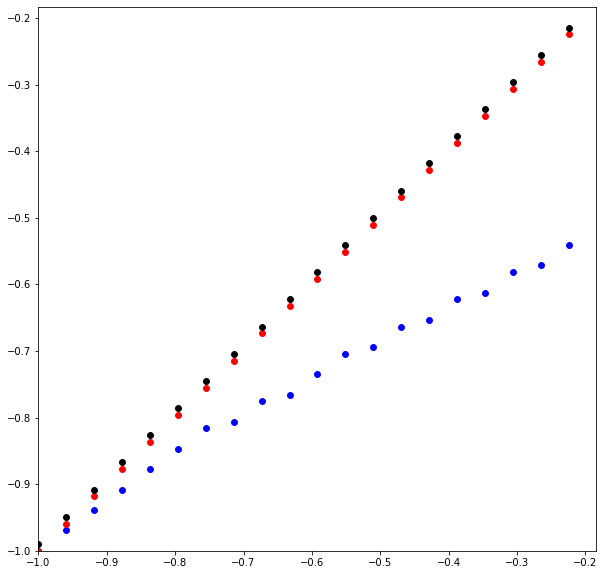

In [340]:
mm = 20
fig, ax = plt.subplots(1, 1,figsize=(10, 10))
ax.scatter( x[0:mm], zl[0:mm],alpha=1, s = 35, c = 'b')
ax.scatter( x[0:mm], x[0:mm],alpha=1, s = 35, c = 'r')
ax.scatter( x[0:mm], z_intp[0:mm],alpha=1, s = 35, c = 'k')
ax.set_xlim([-1, x[mm]])
ax.set_ylim([-1, x[mm]])

In [169]:
np.histogram(zl, bins = 3*nn)

(array([1, 0, 1, ..., 0, 0, 7]),
 array([-1.        , -0.99933333, -0.99866667, ...,  0.99866667,
         0.99933333,  1.        ]))

In [35]:
len(zl)

39

In [8]:
tol = 10**(-9)
lista  = np.array([((1-t)*x[i] + t*x[j],  G0[i,j], int(i), int(j)) \
          for i in range (nn) for j in range(nn) if  G0[i,j]> tol])
lista = lista[lista[:,0].argsort()]
zh = np.array([x[0]]+[(1-t)*x[i] + t*x[i+1] for i in range (nn-1) ])
ipm = [z[1] for z in lista]
ipv = [z[0] for z in lista]
ls = lista[0:10]
ls

array([[-1.00000000e+00,  5.32087669e-04,  0.00000000e+00,
         0.00000000e+00],
       [-1.00000000e+00,  1.16321392e-02,  1.00000000e+00,
         0.00000000e+00],
       [-1.00000000e+00,  4.83700805e-02,  2.00000000e+00,
         0.00000000e+00],
       [-1.00000000e+00,  5.32369550e-02,  3.00000000e+00,
         0.00000000e+00],
       [-8.94736842e-01,  3.29601996e-02,  3.00000000e+00,
         1.00000000e+00],
       [-8.94736842e-01,  6.94439059e-02,  4.00000000e+00,
         1.00000000e+00],
       [-7.89473684e-01,  3.03929264e-02,  4.00000000e+00,
         2.00000000e+00],
       [-7.89473684e-01,  6.17797418e-02,  5.00000000e+00,
         2.00000000e+00],
       [-6.84210526e-01,  1.48981654e-02,  9.00000000e+00,
         3.00000000e+00],
       [-6.84210526e-01,  2.34743348e-03,  8.00000000e+00,
         3.00000000e+00]])

In [10]:
def mass_counter(k):
    return  np.sum(np.array([ z[1]  for z in lista if x[k]<z[0]<x[k+1]]) )

In [11]:
 (mass_counter(0), mass_counter(1), mass_counter(2), mass_counter(3) )
 

(0.0, 0.0, 0.0, 0.0)

In [12]:
np.sum(mc0, axis = 0)

NameError: name 'mc0' is not defined

In [13]:
mc1 = mass_counter(1)

In [ ]:
mass_counter(2)

In [ ]:
mass_interp = np.array([G0[0,0]] + [mass_counter(k) for k in range(nn-1)] )
len(mass_interp)

In [ ]:
np.sum(mass_interp)

(0.0, 0.002)

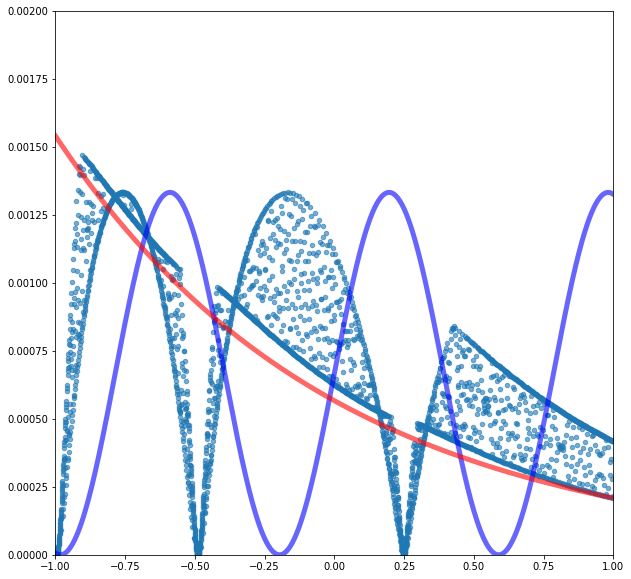

In [74]:
fig, ax = plt.subplots(1, 1,figsize=(10, 10))
ax.scatter( zl, cl+cls,alpha=0.6, s = 20,)
ax.plot(x, pdf1, 'b-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(x, pdf2, 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.set_xlim([-1, 1])
ax.set_ylim([0.0, 0.002])
#ax.plot(x,(1-t)*pdf1+ t*pdf2, 'g-', lw=2, alpha=0.6, label='norm pdf')

In [ ]:
np.sum(weigh)

In [8]:
k = 10
tol = 10**(-10)
np.sum([pdf1[j] for j in range(nn) if IpM[k,j] > tol] )- pdf2[k]

0.1403035143258407

In [ ]:
z = np.sort(z_list)
datos = [z[j+1]-z[j] for j in range(len(z)-1)]
np.histogram(datos)

In [ ]:
datos

In [ ]:
Id = np.identity(nn)
t =0.05
R = ((1-t)/nn)*Id+ t*G0

In [ ]:
pdft = np.sum(R, axis = 0)

In [ ]:
plt.figure( figsize=(5, 5))
ot.plot.plot1D_mat(pdf1, pdft, R, 'OT matrix G0')

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(5, 5))
ax.plot(x, pdf1, 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(x, pdft, 'b-', lw=5, alpha=0.6, label='norm pdf')
#plt.show()

In [ ]:
a, b  = norm.ppf(0.001,loc=0, scale=sdv2), norm.ppf(0.999,loc=0, scale=sdv2)
x = np.linspace(a, b, nn)
pdf1 = norm.pdf(x, loc=mu1, scale=sdv1) 
pdf2 = norm.pdf(x, loc=mu2, scale=sdv2) 
pdf1 /= np.sum(pdf1)
pdf2 /= np.sum(pdf2)

In [ ]:
M = ot.dist(x.reshape((nn, 1)), x.reshape((nn, 1)))

In [ ]:
G0 = ot.emd(pdf1, pdf2, M)

plt.figure( figsize=(5, 5))
ot.plot.plot1D_mat(pdf1, pdf2, G0, 'OT matrix G0')

In [ ]:
lista = [[i,j] for i in range(nn) for j in range(nn) if G0[i,j]>0.0001]
a = lista[3] 
np.sum([ G0[a[0], a[1]] for a in lista ] )

In [ ]:
lista

In [ ]:
 G0[3,1] -pdf2[1]

In [ ]:
W=ot.emd2(pdf1,pdf2,M)
np.sqrt(W)

In [ ]:
x = np.linalg.solve(G0, pdf1)


In [ ]:
pdf1

In [ ]:
np.sum(G0, axis = 1)